In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [10]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [12]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# Getting names of columns in each table
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [19]:
# Column names in Measurment table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [20]:
# Column names in station table
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [23]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

('2017-08-23',)
2016-08-23


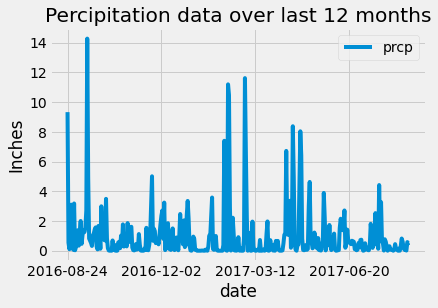

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last)
# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(previous_year)
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, 
       func.sum(Measurement.prcp)]
year_info = session.query(*sel).\
        filter(func.strftime(Measurement.date) > previous_year).\
        group_by(Measurement.date).\
        order_by(Measurement.date).all()  

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(year_info, columns=['date', 'prcp'])



# Sort the dataframe by date
df = df.set_index('date')
df.head()
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_data_plot = df.plot(ylabel = 'Inches', title = 'Percipitation data over last 12 months')
plt.show()



In [36]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


# Exploratory Station Analysis

In [37]:
# Column names in station table
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [41]:
# Design a query to calculate the total number stations in the dataset
Count_stations = session.query(Station.station).count()
Count_stations

9

In [40]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [Measurement.station, 
       func.count(Measurement.date)]
active = session.query(*sel).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.date).desc()).all()
df_stations = pd.DataFrame(active, columns=['Station', 'Count'])
df_stations.sort_values('Count', ascending=False)

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [45]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station,
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
station_info = session.query(*sel).\
        filter(Measurement.station == 'USC00519281').\
        group_by(Measurement.station)
for x in station_info:
    print(x)

('USC00519281', 54.0, 85.0, 71.66378066378067)


In [48]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.date, 
       Measurement.tobs]
temps = session.query(*sel).\
        filter(func.strftime(Measurement.date)>previous_year, Measurement.station == 'USC00519281').\
        group_by(Measurement.date).\
        order_by(Measurement.date).all()
df_temps = pd.DataFrame(temps, columns=['Measurement Date','Temp'])
df_temps


,Measurement Date,Temp
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


<function matplotlib.pyplot.show(close=None, block=None)>

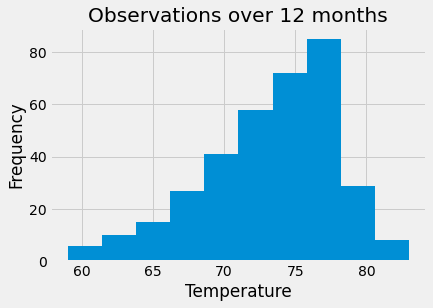

In [55]:
plt.hist(df_temps['Temp'])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Observations over 12 months')
plt.show

# Close session

In [ ]:
# Close Session
session.close()